In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import os

path = '../data/input'
train_file = 'train_ver2.csv'
test_file = 'test_ver2.csv'

In [3]:
train = pd.read_csv(os.path.join(path, train_file))
test = pd.read_csv(os.path.join(path, test_file))

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
print '{} rows, {} columns'.format(train.shape[0], train.shape[1])
print '-'*30
for col, tp, cnt in zip(train.columns, train.dtypes, train.isnull().sum(axis=0)):
    print '{:22s}\t\t{}\t\t{}'.format(col, tp, cnt)

13647309 rows, 48 columns
------------------------------
fecha_dato            		object		0
ncodpers              		int64		0
ind_empleado          		object		27734
pais_residencia       		object		27734
sexo                  		object		27804
age                   		object		0
fecha_alta            		object		27734
ind_nuevo             		float64		27734
antiguedad            		object		0
indrel                		float64		27734
ult_fec_cli_1t        		object		13622516
indrel_1mes           		object		149781
tiprel_1mes           		object		149781
indresi               		object		27734
indext                		object		27734
conyuemp              		object		13645501
canal_entrada         		object		186126
indfall               		object		27734
tipodom               		float64		27735
cod_prov              		float64		93591
nomprov               		object		93591
ind_actividad_cliente 		float64		27734
renta                 		float64		2794375
segmento              		object		189368
ind_ahor_fin_ult1     		int64	

### Check for each columns

In [14]:
len(train['ncodpers'].unique())

956645

In [6]:
train['fecha_dato'].value_counts()

2016-05-28    931453
2016-04-28    928274
2016-03-28    925076
2016-02-28    920904
2016-01-28    916269
2015-12-28    912021
2015-11-28    906109
2015-10-28    892251
2015-09-28    865440
2015-08-28    843201
2015-07-28    829817
2015-06-28    632110
2015-05-28    631957
2015-04-28    630367
2015-03-28    629209
2015-02-28    627394
2015-01-28    625457
Name: fecha_dato, dtype: int64

In [19]:
cnts = train.groupby('ncodpers')['fecha_dato'].count()
print cnts.min()
print cnts.max()

1
17


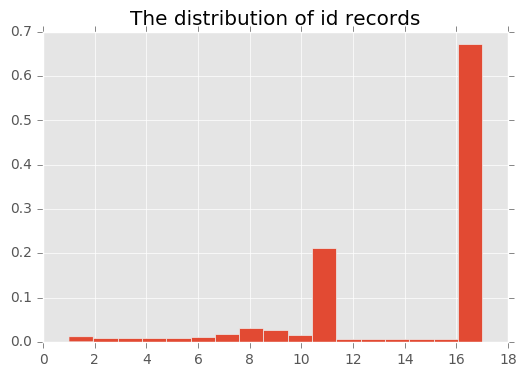

In [23]:
cnts.hist(bins=17, normed=1)
plt.title('The distribution of id records')
plt.show()

#### obs
1. 13647309 rows, 48 columns
2. There are 956645 ids in training set, and 17 diffrent records date. No all of the ids has the all 17 records.
3. over 65% of ids have 17 records.

In [32]:
train[train['ind_empleado'].isnull()].head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
261,2015-01-28,1050741,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1029,2015-01-28,1051017,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1063,2015-01-28,1051064,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1154,2015-01-28,1051387,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1779,2015-01-28,1048660,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0


In [36]:
train[train['ind_empleado'].isnull()].isnull().sum(axis=0)

fecha_dato                   0
ncodpers                     0
ind_empleado             27734
pais_residencia          27734
sexo                     27734
age                          0
fecha_alta               27734
ind_nuevo                27734
antiguedad                   0
indrel                   27734
ult_fec_cli_1t           27734
indrel_1mes              27734
tiprel_1mes              27734
indresi                  27734
indext                   27734
conyuemp                 27734
canal_entrada            27734
indfall                  27734
tipodom                  27734
cod_prov                 27734
nomprov                  27734
ind_actividad_cliente    27734
renta                    27734
segmento                 27734
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp

In [37]:
target_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1',
               'ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
               'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1',
               'ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
               'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1',
               'ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1',
               'ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
               'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']
train[train['ind_empleado'].isnull()][target_cols].sum(axis=0)

ind_ahor_fin_ult1        0.0
ind_aval_fin_ult1        0.0
ind_cco_fin_ult1      7438.0
ind_cder_fin_ult1        4.0
ind_cno_fin_ult1       604.0
ind_ctju_fin_ult1      248.0
ind_ctma_fin_ult1      485.0
ind_ctop_fin_ult1     1233.0
ind_ctpp_fin_ult1      353.0
ind_deco_fin_ult1      442.0
ind_deme_fin_ult1        5.0
ind_dela_fin_ult1      165.0
ind_ecue_fin_ult1     1202.0
ind_fond_fin_ult1      128.0
ind_hip_fin_ult1       213.0
ind_plan_fin_ult1       61.0
ind_pres_fin_ult1     1334.0
ind_reca_fin_ult1    10175.0
ind_tjcr_fin_ult1      220.0
ind_valo_fin_ult1      151.0
ind_viv_fin_ult1        27.0
ind_nomina_ult1        205.0
ind_nom_pens_ult1      225.0
ind_recibo_ult1        909.0
dtype: float64

In [39]:
train[target_cols].sum(axis=0)

ind_ahor_fin_ult1       1396.0
ind_aval_fin_ult1        316.0
ind_cco_fin_ult1     8945588.0
ind_cder_fin_ult1       5376.0
ind_cno_fin_ult1     1103620.0
ind_ctju_fin_ult1     129297.0
ind_ctma_fin_ult1     132742.0
ind_ctop_fin_ult1    1760616.0
ind_ctpp_fin_ult1     591008.0
ind_deco_fin_ult1      24275.0
ind_deme_fin_ult1      22668.0
ind_dela_fin_ult1     586381.0
ind_ecue_fin_ult1    1129227.0
ind_fond_fin_ult1     252284.0
ind_hip_fin_ult1       80336.0
ind_plan_fin_ult1     125159.0
ind_pres_fin_ult1      35857.0
ind_reca_fin_ult1     716980.0
ind_tjcr_fin_ult1     605786.0
ind_valo_fin_ult1     349475.0
ind_viv_fin_ult1       52511.0
ind_nomina_ult1       745961.0
ind_nom_pens_ult1     810085.0
ind_recibo_ult1      1745712.0
dtype: float64

1. 27734 records are missing from all columns which contain missing value.  
2. Many of those records are positive in tagets. So those records cannot simply delete. 

In [26]:
train['ind_empleado'].value_counts()

N    13610977
B        3566
F        2523
A        2492
S          17
Name: ind_empleado, dtype: int64

In [38]:
for col, tp, cnt in zip(test.columns, test.dtypes, test.isnull().sum(axis=0)):
    print '{:22s}\t\t{}\t\t{}'.format(col, tp, cnt)

fecha_dato            		object		0
ncodpers              		int64		0
ind_empleado          		object		0
pais_residencia       		object		0
sexo                  		object		5
age                   		int64		0
fecha_alta            		object		0
ind_nuevo             		int64		0
antiguedad            		int64		0
indrel                		int64		0
ult_fec_cli_1t        		object		927932
indrel_1mes           		float64		23
tiprel_1mes           		object		23
indresi               		object		0
indext                		object		0
conyuemp              		object		929511
canal_entrada         		object		2081
indfall               		object		0
tipodom               		int64		0
cod_prov              		float64		3996
nomprov               		object		3996
ind_actividad_cliente 		int64		0
renta                 		object		0
segmento              		object		2248


In [8]:
test['ncodpers'].unique().shape

(929615,)

In [9]:
test['fecha_dato'].value_counts()

2016-06-28    929615
Name: fecha_dato, dtype: int64

In [10]:
df1 = train.groupby(['ncodpers', 'fecha_dato']).sum()

In [11]:
df1.head(17)

ind_nuevo  indrel  tipodom  cod_prov  \
ncodpers fecha_dato                                         
15889    2015-01-28        0.0     1.0      1.0      28.0   
         2015-02-28        0.0     1.0      1.0      28.0   
         2015-03-28        0.0     1.0      1.0      28.0   
         2015-04-28        0.0     1.0      1.0      28.0   
         2015-05-28        0.0     1.0      1.0      28.0   
         2015-06-28        0.0     1.0      1.0      28.0   
         2015-07-28        0.0     1.0      1.0      28.0   
         2015-08-28        0.0     1.0      1.0      28.0   
         2015-09-28        0.0     1.0      1.0      28.0   
         2015-10-28        0.0     1.0      1.0      28.0   
         2015-11-28        0.0     1.0      1.0      28.0   
         2015-12-28        0.0     1.0      1.0      28.0   
         2016-01-28        0.0     1.0      1.0      28.0   
         2016-02-28        0.0     1.0      1.0      28.0   
         2016-03-28        0.0     1.0      1.0      28.0   
         2016-04-28        0.0     1.0      1.0      28.0   
         2016-05-28        0.0     1.0      1.0      28.0   

                     ind_actividad_cliente     renta  ind_ahor_fin_ult1  \
ncodpers fecha_dato                                                       
15889    2015-01-28                    1.0  326124.9                  0   
         2015-02-28                    1.0  326124.9                  0   
         2015-03-28                    1.0  326124.9                  0   
         2015-04-28                    1.0  326124.9                  0   
         2015-05-28                    1.0  326124.9                  0   
         2015-06-28                    1.0  326124.9                  0   
         2015-07-28                    1.0  326124.9                  0   
         2015-08-28                    1.0  326124.9                  0   
         2015-09-28                    1.0  326124.9                  0   
         2015-10-28                    1.0  326124.9                  0   
         2015-11-28                    1.0  326124.9                  0   
         2015-12-28                    1.0  326124.9                  0   
         2016-01-28                    1.0  326124.9                  0   
         2016-02-28                    1.0  326124.9                  0   
         2016-03-28                    1.0  326124.9                  0   
         2016-04-28                    1.0  326124.9                  0   
         2016-05-28                    1.0  326124.9                  0   

                     ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  \
ncodpers fecha_dato                                                           
15889    2015-01-28                  0                 1                  0   
         2015-02-28                  0                 1                  0   
         2015-03-28                  0                 1                  0   
         2015-04-28                  0                 1                  0   
         2015-05-28                  0                 1                  0   
         2015-06-28                  0                 1                  0   
         2015-07-28                  0                 1                  0   
         2015-08-28                  0                 1                  0   
         2015-09-28                  0                 1                  0   
         2015-10-28                  0                 1                  0   
         2015-11-28                  0                 1                  0   
         2015-12-28                  0                 1                  0   
         2016-01-28                  0                 1                  0   
         2016-02-28                  0                 1                  0   
         2016-03-28                  0                 1                  0   
         2016-04-28                  0                 1                  0   
         2016

In [55]:
import csv
import datetime
from operator import sub
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn import preprocessing, ensemble

mapping_dict = {
'ind_empleado'  : {-99:0, 'N':1, 'B':2, 'F':3, 'A':4, 'S':5},
'sexo'          : {'V':0, 'H':1, -99:2},
'ind_nuevo'     : {'0':0, '1':1, -99:2},
'indrel'        : {'1':0, '99':1, -99:2},
'indrel_1mes'   : {-99:0, '1.0':1, '1':1, '2.0':2, '2':2, '3.0':3, '3':3, '4.0':4, '4':4, 'P':5},
'tiprel_1mes'   : {-99:0, 'I':1, 'A':2, 'P':3, 'R':4, 'N':5},
'indresi'       : {-99:0, 'S':1, 'N':2},
'indext'        : {-99:0, 'S':1, 'N':2},
'conyuemp'      : {-99:0, 'S':1, 'N':2},
'indfall'       : {-99:0, 'S':1, 'N':2},
'tipodom'       : {-99:0, '1':1},
'ind_actividad_cliente' : {'0':0, '1':1, -99:2},
'segmento'      : {'02 - PARTICULARES':0, '03 - UNIVERSITARIO':1, '01 - TOP':2, -99:2},
'pais_residencia' : {'LV': 102, 'BE': 12, 'BG': 50, 'BA': 61, 'BM': 117, 'BO': 62, 'JP': 82, 'JM': 116, 'BR': 17, 'BY': 64, 'BZ': 113, 'RU': 43, 'RS': 89, 'RO': 41, 'GW': 99, 'GT': 44, 'GR': 39, 'GQ': 73, 'GE': 78, 'GB': 9, 'GA': 45, 'GN': 98, 'GM': 110, 'GI': 96, 'GH': 88, 'OM': 100, 'HR': 67, 'HU': 106, 'HK': 34, 'HN': 22, 'AD': 35, 'PR': 40, 'PT': 26, 'PY': 51, 'PA': 60, 'PE': 20, 'PK': 84, 'PH': 91, 'PL': 30, 'EE': 52, 'EG': 74, 'ZA': 75, 'EC': 19, 'AL': 25, 'VN': 90, 'ET': 54, 'ZW': 114, 'ES': 0, 'MD': 68, 'UY': 77, 'MM': 94, 'ML': 104, 'US': 15, 'MT': 118, 'MR': 48, 'UA': 49, 'MX': 16, 'IL': 42, 'FR': 8, 'MA': 38, 'FI': 23, 'NI': 33, 'NL': 7, 'NO': 46, 'NG': 83, 'NZ': 93, 'CI': 57, 'CH': 3, 'CO': 21, 'CN': 28, 'CM': 55, 'CL': 4, 'CA': 2, 'CG': 101, 'CF': 109, 'CD': 112, 'CZ': 36, 'CR': 32, 'CU': 72, 'KE': 65, 'KH': 95, 'SV': 53, 'SK': 69, 'KR': 87, 'KW': 92, 'SN': 47, 'SL': 97, 'KZ': 111, 'SA': 56, 'SG': 66, 'SE': 24, 'DO': 11, 'DJ': 115, 'DK': 76, 'DE': 10, 'DZ': 80, 'MK': 105, -99: 1, 'LB': 81, 'TW': 29, 'TR': 70, 'TN': 85, 'LT': 103, 'LU': 59, 'TH': 79, 'TG': 86, 'LY': 108, 'AE': 37, 'VE': 14, 'IS': 107, 'IT': 18, 'AO': 71, 'AR': 13, 'AU': 63, 'AT': 6, 'IN': 31, 'IE': 5, 'QA': 58, 'MZ': 27},
'canal_entrada' : {'013': 49, 'KHP': 160, 'KHQ': 157, 'KHR': 161, 'KHS': 162, 'KHK': 10, 'KHL': 0, 'KHM': 12, 'KHN': 21, 'KHO': 13, 'KHA': 22, 'KHC': 9, 'KHD': 2, 'KHE': 1, 'KHF': 19, '025': 159, 'KAC': 57, 'KAB': 28, 'KAA': 39, 'KAG': 26, 'KAF': 23, 'KAE': 30, 'KAD': 16, 'KAK': 51, 'KAJ': 41, 'KAI': 35, 'KAH': 31, 'KAO': 94, 'KAN': 110, 'KAM': 107, 'KAL': 74, 'KAS': 70, 'KAR': 32, 'KAQ': 37, 'KAP': 46, 'KAW': 76, 'KAV': 139, 'KAU': 142, 'KAT': 5, 'KAZ': 7, 'KAY': 54, 'KBJ': 133, 'KBH': 90, 'KBN': 122, 'KBO': 64, 'KBL': 88, 'KBM': 135, 'KBB': 131, 'KBF': 102, 'KBG': 17, 'KBD': 109, 'KBE': 119, 'KBZ': 67, 'KBX': 116, 'KBY': 111, 'KBR': 101, 'KBS': 118, 'KBP': 121, 'KBQ': 62, 'KBV': 100, 'KBW': 114, 'KBU': 55, 'KCE': 86, 'KCD': 85, 'KCG': 59, 'KCF': 105, 'KCA': 73, 'KCC': 29, 'KCB': 78, 'KCM': 82, 'KCL': 53, 'KCO': 104, 'KCN': 81, 'KCI': 65, 'KCH': 84, 'KCK': 52, 'KCJ': 156, 'KCU': 115, 'KCT': 112, 'KCV': 106, 'KCQ': 154, 'KCP': 129, 'KCS': 77, 'KCR': 153, 'KCX': 120, 'RED': 8, 'KDL': 158, 'KDM': 130, 'KDN': 151, 'KDO': 60, 'KDH': 14, 'KDI': 150, 'KDD': 113, 'KDE': 47, 'KDF': 127, 'KDG': 126, 'KDA': 63, 'KDB': 117, 'KDC': 75, 'KDX': 69, 'KDY': 61, 'KDZ': 99, 'KDT': 58, 'KDU': 79, 'KDV': 91, 'KDW': 132, 'KDP': 103, 'KDQ': 80, 'KDR': 56, 'KDS': 124, 'K00': 50, 'KEO': 96, 'KEN': 137, 'KEM': 155, 'KEL': 125, 'KEK': 145, 'KEJ': 95, 'KEI': 97, 'KEH': 15, 'KEG': 136, 'KEF': 128, 'KEE': 152, 'KED': 143, 'KEC': 66, 'KEB': 123, 'KEA': 89, 'KEZ': 108, 'KEY': 93, 'KEW': 98, 'KEV': 87, 'KEU': 72, 'KES': 68, 'KEQ': 138, -99: 6, 'KFV': 48, 'KFT': 92, 'KFU': 36, 'KFR': 144, 'KFS': 38, 'KFP': 40, 'KFF': 45, 'KFG': 27, 'KFD': 25, 'KFE': 148, 'KFB': 146, 'KFC': 4, 'KFA': 3, 'KFN': 42, 'KFL': 34, 'KFM': 141, 'KFJ': 33, 'KFK': 20, 'KFH': 140, 'KFI': 134, '007': 71, '004': 83, 'KGU': 149, 'KGW': 147, 'KGV': 43, 'KGY': 44, 'KGX': 24, 'KGC': 18, 'KGN': 11}
}
cat_cols = list(mapping_dict.keys())

target_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1',
               'ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
               'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1',
               'ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
               'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1',
               'ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1',
               'ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
               'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']
target_cols = target_cols[2:]

def getTarget(row):
    tlist = []
    for col in target_cols:
        if row[col].strip() in ['', 'NA']:
            target = 0
        else:
            target = int(float(row[col]))
        tlist.append(target)
    return tlist

def getIndex(row, col):
    val = row[col].strip()
    if val not in ['','NA']:
        ind = mapping_dict[col][val]
    else:
        ind = mapping_dict[col][-99]
    return ind

def getAge(row):
    mean_age = 40.
    min_age = 20.
    max_age = 90.
    range_age = max_age - min_age
    age = row['age'].strip()
    if age == 'NA' or age == '':
        age = mean_age
    else:
        age = float(age)
        if age < min_age:
            age = min_age
        elif age > max_age:
            age = max_age
    return round( (age - min_age) / range_age, 4)

def getCustSeniority(row):
    min_value = 0.
    max_value = 256.
    range_value = max_value - min_value
    missing_value = 0.
    cust_seniority = row['antiguedad'].strip()
    if cust_seniority == 'NA' or cust_seniority == '':
        cust_seniority = missing_value
    else:
        cust_seniority = float(cust_seniority)
        if cust_seniority < min_value:
            cust_seniority = min_value
        elif cust_seniority > max_value:
            cust_seniority = max_value
    return round((cust_seniority-min_value) / range_value, 4)

def getRent(row):
    min_value = 0.
    max_value = 1500000.
    range_value = max_value - min_value
    missing_value = 101850.
    rent = row['renta'].strip()
    if rent == 'NA' or rent == '':
        rent = missing_value
    else:
        rent = float(rent)
        if rent < min_value:
            rent = min_value
        elif rent > max_value:
            rent = max_value
    return round((rent-min_value) / range_value, 6)

def processData(in_file_name, cust_dict):
    x_vars_list = []
    y_vars_list = []
    for row in csv.DictReader(in_file_name):
        # use only the four months as specified by breakfastpirate #
        if row['fecha_dato'] not in ['2015-05-28', '2015-06-28', '2016-05-28', '2016-06-28']:
            continue

        cust_id = int(row['ncodpers'])
        if row['fecha_dato'] in ['2015-05-28', '2016-05-28']:    
            target_list = getTarget(row)
            cust_dict[cust_id] =  target_list[:]
            continue

        x_vars = []
        for col in cat_cols:
            x_vars.append( getIndex(row, col) )
        x_vars.append( getAge(row) )
        x_vars.append( getCustSeniority(row) )
        x_vars.append( getRent(row) )

        if row['fecha_dato'] == '2016-06-28':
            prev_target_list = cust_dict.get(cust_id, [0]*22)
            x_vars_list.append(x_vars + prev_target_list)
        elif row['fecha_dato'] == '2015-06-28':
            prev_target_list = cust_dict.get(cust_id, [0]*22)
            target_list = getTarget(row)
            new_products = [max(x1 - x2,0) for (x1, x2) in zip(target_list, prev_target_list)]
            if sum(new_products) > 0:
                for ind, prod in enumerate(new_products):
                    if prod>0:
                        assert len(prev_target_list) == 22
                        x_vars_list.append(x_vars+prev_target_list)
                        y_vars_list.append(ind)

    return x_vars_list, y_vars_list, cust_dict
            
def runXGB(train_X, train_y, seed_val=123):
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.05
    param['max_depth'] = 4
    param['silent'] = 1
    param['num_class'] = 22
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 2
    param['subsample'] = 0.9
    param['colsample_bytree'] = 0.9
    param['seed'] = seed_val
    num_rounds = 190

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)
    model = xgb.train(plst, xgtrain, num_rounds)    
    return model


if __name__ == "__main__":
    start_time = datetime.datetime.now()
    data_path = "../data/input/"
    train_file =  open(data_path + "train_ver2.csv")
    x_vars_list, y_vars_list, cust_dict = processData(train_file, {})
    train_X = np.array(x_vars_list)
    train_y = np.array(y_vars_list)
    print(np.unique(train_y))
#     del x_vars_list, y_vars_list
    train_file.close()
    print(train_X.shape, train_y.shape)
    test_file = open(data_path + "test_ver2.csv")
    x_vars_list_te, y_vars_list_te, cust_dict_te = processData(test_file, cust_dict)
    test_X = np.array(x_vars_list_te)
#     del x_vars_list
    test_file.close()
    print(test_X.shape)

    print("Building model..")
    model = runXGB(train_X, train_y, seed_val=0)
#     del train_X, train_y
    print("Predicting..")
    xgtest = xgb.DMatrix(test_X)
    preds = model.predict(xgtest)
#     del test_X, xgtest

    print("Getting the top products..")
    target_cols = np.array(target_cols)
    preds = np.argsort(preds, axis=1)
#     preds = np.fliplr(preds)[:,:8]
#     test_id = np.array(pd.read_csv(data_path + "test_ver2.csv", usecols=['ncodpers'])['ncodpers'])
#     final_preds = [" ".join(list(target_cols[pred])) for pred in preds]
#     out_df = pd.DataFrame({'ncodpers':test_id, 'added_products':final_preds})
#     out_df.to_csv('sub_xgb_new.csv', index=False)
#     print(datetime.datetime.now()-start_time)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
((45679, 40), (45679,))
(929615, 40)
Building model..
Predicting..
Getting the top products..
0:03:40.935140


In [60]:
pr = model.predict(xgtest)

In [67]:
train_X[:2,:]

array([[ 0.      ,  1.      ,  1.      ,  2.      ,  0.      ,  0.      ,
         1.      ,  1.      ,  1.      ,  2.      ,  1.      ,  1.      ,
         0.      ,  0.      ,  1.      ,  0.1143  ,  0.1328  ,  0.126345,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  1.      ,  1.      ,  2.      ,  0.      ,  0.      ,
         1.      ,  1.      ,  1.      ,  2.      ,  1.      ,  1.      ,
         0.      ,  0.      ,  1.      ,  0.1143  ,  0.1328  ,  0.126345,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ]])

In [66]:
test_X.shape

(929615, 40)

In [72]:
np.fliplr(np.argsort(pr, axis=1))

array([[21, 15,  9, ...,  0,  7,  3],
       [21, 15, 19, ..., 18, 12,  3],
       [21, 20, 19, ..., 12,  6,  3],
       ..., 
       [21, 16,  9, ..., 12, 18,  3],
       [21, 20, 16, ..., 14, 18, 12],
       [ 0, 10, 21, ...,  3, 12, 18]])

In [80]:
np.fliplr(np.arange(1, 10).reshape(3,3))

array([[3, 2, 1],
       [6, 5, 4],
       [9, 8, 7]])

15